# Zain KSA Financial Analysis

This notebook performs a comprehensive financial analysis of Zain KSA company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the Zain KSA raw data from the CSV file
zain_ksa_raw_data = pd.read_csv('zain_ksa_data.csv')

# Display the first few rows to understand the data structure
zain_ksa_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Zain KSA,Telecommunications,8386000,485000,1511000,27738000,23635000
1,2020,Zain KSA,Telecommunications,7917000,260000,1002000,28158000,19429000
2,2021,Zain KSA,Telecommunications,7901000,214000,699000,27877000,18837000
3,2022,Zain KSA,Telecommunications,9075000,550000,1066000,28461000,18659000
4,2023,Zain KSA,Telecommunications,9883000,1267000,871000,27378000,16787000


In [3]:
# Get a summary of the dataset including data types and non-null counts
zain_ksa_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Zain KSA’s financial statements.

In [4]:
# Sort the data by year to ensure chronological order
zain_ksa_raw_data = zain_ksa_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
zain_ksa_raw_data[numeric_cols] = zain_ksa_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
zain_ksa_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Zain KSA,Telecommunications,8386000.0,485000.0,1511000.0,27738000.0,23635000.0
1,2020,Zain KSA,Telecommunications,7917000.0,260000.0,1002000.0,28158000.0,19429000.0
2,2021,Zain KSA,Telecommunications,7901000.0,214000.0,699000.0,27877000.0,18837000.0
3,2022,Zain KSA,Telecommunications,9075000.0,550000.0,1066000.0,28461000.0,18659000.0
4,2023,Zain KSA,Telecommunications,9883000.0,1267000.0,871000.0,27378000.0,16787000.0
5,2024,Zain KSA,Telecommunications,10365000.0,696000.0,1199000.0,28135000.0,17429000.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
zain_ksa_new_data = zain_ksa_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
zain_ksa_new_data['Revenue_Growth_%'] = zain_ksa_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(zain_ksa_new_data['Revenue_SAR'].iloc[0], zain_ksa_new_data['Revenue_SAR'].iloc[-1], len(zain_ksa_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 4.33%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
zain_ksa_new_data['Operating_Margin_%'] = (zain_ksa_new_data['Operating_Income_SAR'] / zain_ksa_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
zain_ksa_new_data['Net_Profit_Margin_%'] = (zain_ksa_new_data['Net_Income_SAR'] / zain_ksa_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(zain_ksa_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019           18.018125             5.783449
1  2020           12.656309             3.284072
2  2021            8.846981             2.708518
3  2022           11.746556             6.060606
4  2023            8.813113            12.819994
5  2024           11.567776             6.714906


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
zain_ksa_new_data['Liabilities_to_Assets_Ratio'] = (zain_ksa_new_data['Total_Liabilities_SAR'] / zain_ksa_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
zain_ksa_new_data['Asset_Turnover_Ratio'] = zain_ksa_new_data['Revenue_SAR'] / zain_ksa_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(zain_ksa_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    85.208018              0.302329
1  2020                    68.999929              0.281163
2  2021                    67.571833              0.283424
3  2022                    65.559889              0.318857
4  2023                    61.315655              0.360983
5  2024                    61.947752              0.368402


## Visualizations


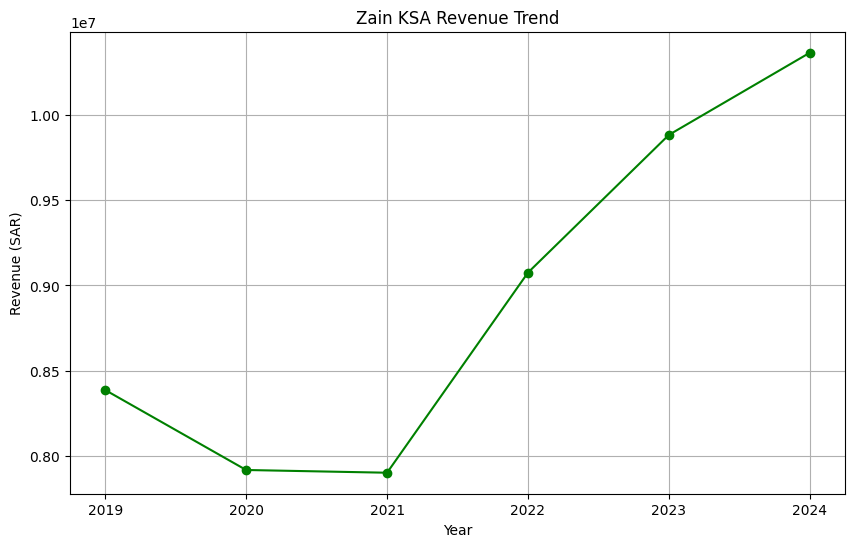

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(zain_ksa_new_data["Year"], zain_ksa_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Zain KSA Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

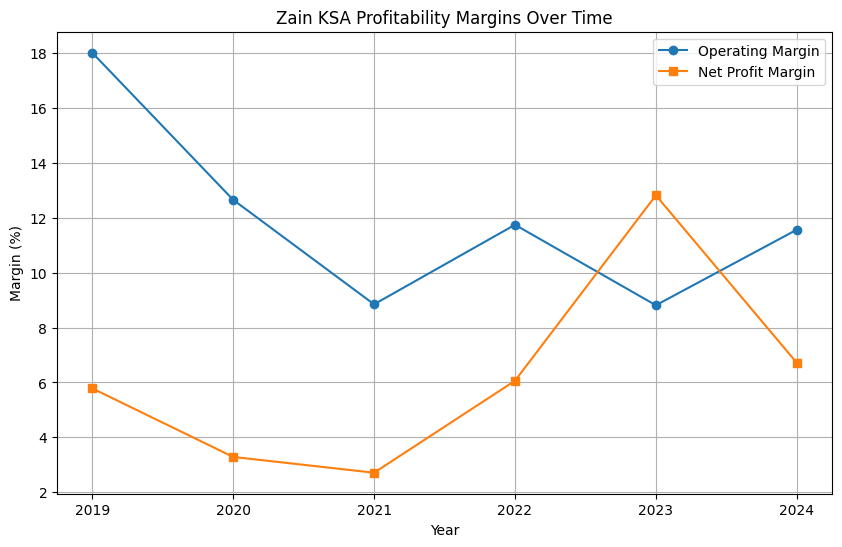

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(zain_ksa_new_data["Year"], zain_ksa_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(zain_ksa_new_data["Year"], zain_ksa_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Zain KSA Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
zain_ksa_new_data.to_csv('zain_ksa_analysis_results.csv', index=False)
print("Analysis results saved to 'zain_ksa_analysis_results.csv'")

Analysis results saved to 'zain_ksa_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Zain KSA's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.